In [2]:
import pandas as pd
import numpy
import re
from sklearn import *
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("All_Data_Cleaned.csv")


C:\Users\PC\AppData\Local\Temp\ipykernel_8340\828584180.py:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("All_Data_Cleaned.csv")


# Domain Knowledge: Analyse the relationship between best squat (Best3SquatKg) and best deadlift (Best3DeadliftKg) while considering weight class 

This goes beyond a simple correlation analysis. You might explore the ratio between squat and deadlift within weight classes. For instance, calculate the average squat/deadlift ratio for each weight class and see if there are trends (e.g., heavier weight classes might have a lower ratio).

In [23]:
df["WeightClassKg"].value_counts()

WeightClassKg
74-83kg      132863
83-93kg      117851
93-105kg     109471
66-74kg       89255
105-120kg     85522
84kg+         69320
120kg+        65106
<59kg         53316
59-66kg       52530
63-69kg       45825
76-84kg       38504
69-76kg       37740
57-63kg       35244
52-57kg       31386
<52kg         16340
Name: count, dtype: int64

<Axes: >

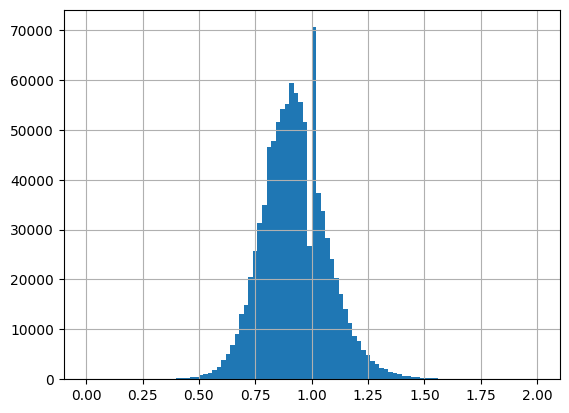

In [14]:
squat_deadlift_df = df.copy()

squat_deadlift_df["Squat Deadlift Ratio"] = squat_deadlift_df["Best3SquatKg"] / squat_deadlift_df["Best3DeadliftKg"]
squat_deadlift_df["Squat Deadlift Ratio"].hist(bins=100,range=(0,2))

Squat to deadlift ratio seems to follow a relatively normal distribution 

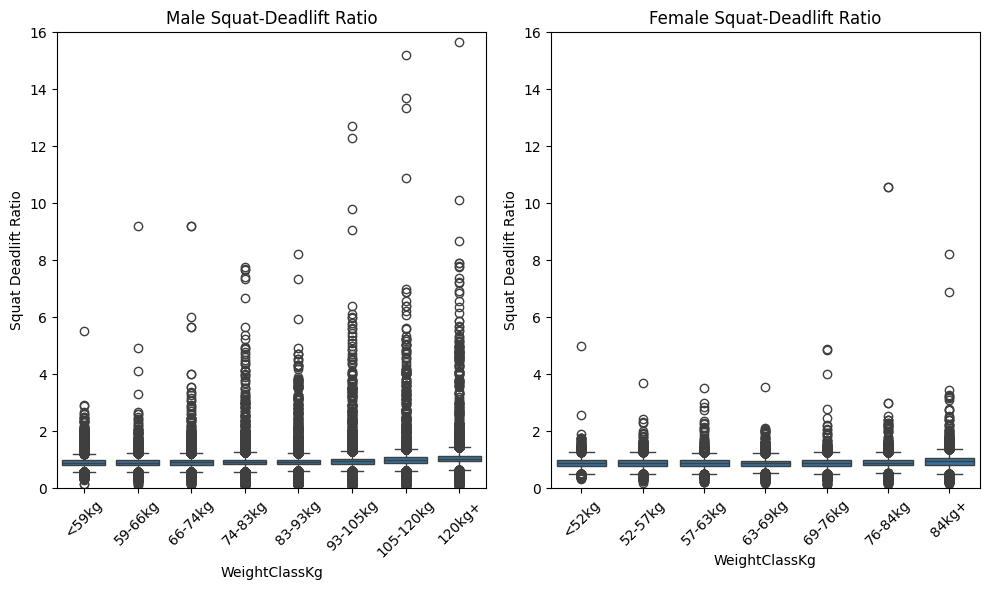

In [35]:
# Group the data by weight class

m_squat_deadlift_df = squat_deadlift_df[squat_deadlift_df["Sex"] == "M"]
f_squat_deadlift_df = squat_deadlift_df[squat_deadlift_df["Sex"] == "F"]


m_weight_classes = ["<59kg","59-66kg","66-74kg","74-83kg","83-93kg","93-105kg","105-120kg","120kg+"]
f_weight_classes = ["<52kg","52-57kg","57-63kg","63-69kg","69-76kg","76-84kg","84kg+"]

# Plot the distributions for each group
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(data = m_squat_deadlift_df,
            x=m_squat_deadlift_df["WeightClassKg"],
            y=m_squat_deadlift_df["Squat Deadlift Ratio"],
            order= m_weight_classes,
            ax = ax1)
ax1.set_title("Male Squat-Deadlift Ratio")
ax1.set_ylim(0, 16)
ax1.tick_params(axis='x', which='both', rotation=45)
sns.boxplot(data = f_squat_deadlift_df,
            x=f_squat_deadlift_df["WeightClassKg"],
            y=f_squat_deadlift_df["Squat Deadlift Ratio"],
            order= f_weight_classes,
            ax = ax2)
ax2.set_title("Female Squat-Deadlift Ratio")
ax2.set_ylim(0, 16)
ax2.tick_params(axis='x', which='both', rotation=45) 

plt.tight_layout()
plt.show()




In [47]:
m_dict ={}

for i in m_weight_classes:
    temp_df = squat_deadlift_df[squat_deadlift_df["WeightClassKg"] == i]
    m_dict[i] = temp_df["Squat Deadlift Ratio"].mean()


print("Mens")
for cl, ratio in m_dict.items():
    print(cl, ": ", ratio)


f_dict ={}

for i in f_weight_classes:
    temp_df = squat_deadlift_df[squat_deadlift_df["WeightClassKg"] == i]
    f_dict[i] = temp_df["Squat Deadlift Ratio"].mean()

print("\nFemales")
for cl, ratio in f_dict.items():
    print(cl, ": ", ratio)

Mens
<59kg :  0.8943471921328087
59-66kg :  0.8960944395181766
66-74kg :  0.900946838223426
74-83kg :  0.9148592286312626
83-93kg :  0.9287584642357773
93-105kg :  0.9558350715870705
105-120kg :  0.9938762064617284
120kg+ :  1.045519733499401

Females
<52kg :  0.8819590629410463
52-57kg :  0.8826996576881198
57-63kg :  0.8764249611216901
63-69kg :  0.8744568296041078
69-76kg :  0.8869518806647362
76-84kg :  0.894588932560469
84kg+ :  0.9402757760914366


The average squat to bench ratio increases with an increase in weight class